<a href="https://colab.research.google.com/github/tusk666/smallsix./blob/main/smallsix1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf #lấy data từ web luôn
import datetime
from datetime import date, timedelta
today = date.today()
d_1 = today.strftime('%Y-%m-%d') #ngày giờ hiện tại
end_date = d_1 #ngày kết thúc
d_2 = date.today() - timedelta(days=7000)
start_date = d_2.strftime('%Y-%m-%d')
data = yf.download('AAPL',
                  start=start_date,
                  end=end_date,
                  progress=False)
data['Date'] = data.index
data.head()

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2005-06-13,1.281786,1.307500,1.279286,1.282143,1.083991,435772400,2005-06-13
2005-06-14,1.282857,1.291071,1.276786,1.285714,1.087010,347846800,2005-06-14
2005-06-15,1.316786,1.332143,1.296429,1.326071,1.121130,563343200,2005-06-15
2005-06-16,1.328214,1.360000,1.315000,1.356429,1.146797,547674400,2005-06-16
2005-06-17,1.373929,1.376429,1.351071,1.368214,1.156760,596125600,2005-06-17


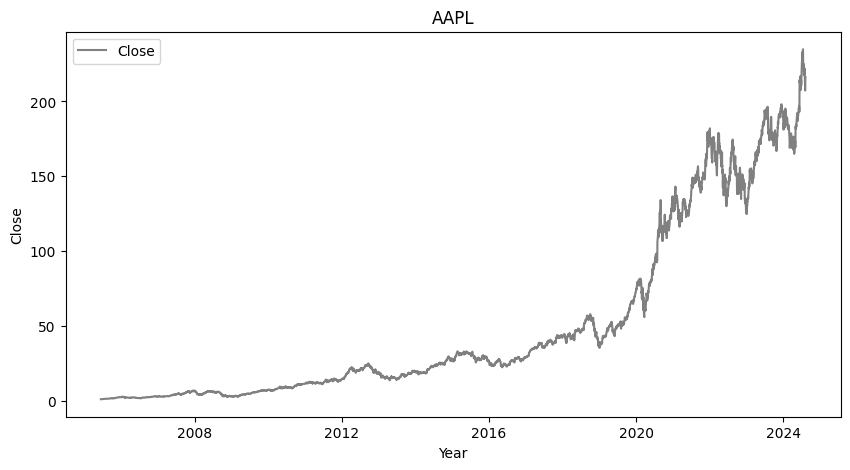

In [ ]:
import matplotlib.pyplot as plt
data['Year']=data['Date'].dt.year
plt.figure(figsize=(10,5))
plt.plot(data['Date'], data['Close'], label='Close', color='gray')
plt.xlabel('Year')
plt.ylabel('Close')
plt.title('AAPL')
plt.legend(loc='best')
plt.show()

In [ ]:
df=pd.DataFrame(data,columns=['Date','Close'])
df.index=df.Date
df.drop('Date',axis=1,inplace=True)
df

,Close
Date,
2005-06-13,1.282143
2005-06-14,1.285714
2005-06-15,1.326071
2005-06-16,1.356429
2005-06-17,1.368214
...,...
2024-08-05,209.270004
2024-08-06,207.229996
2024-08-07,209.820007


In [ ]:
#chia data
df1=df.values
train_dt=df1[:4000]
test_dt=df1[4000:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
sc_train=sc.fit_transform(df1)

In [ ]:
#vong lap gia tri
x_train,y_train=[],[]
for i in range(50,len(train_dt)):
  x_train.append(sc_train[i-50:i,0])
  y_train.append(sc_train[i,0])

In [ ]:
#xep thanh mang 2 chieu
x_train=np.array(x_train)
y_train=np.array(y_train)

In [ ]:
#xep thanh mang 1 chieu
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
y_train = np.reshape(y_train,(y_train.shape[0],1))


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
model = Sequential()   # khởi tạo model Sequential
# thêm các layer cho model
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 116,033 (453.25 KB)

 Trainable params: 116,033 (453.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')# thuật toán tối ưu adam
model.fit(x_train, y_train, batch_size=50, epochs=100) #chia nhỏ data và train

Epoch 1/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 13s 102ms/step - loss: 0.0054
Epoch 2/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - loss: 7.2505e-04
Epoch 3/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - loss: 5.8608e-04
Epoch 4/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - loss: 4.7596e-04
Epoch 5/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step - loss: 5.0568e-04
Epoch 6/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 12s 118ms/step - loss: 4.3688e-04
Epoch 7/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - loss: 5.4567e-04
Epoch 8/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - loss: 3.8927e-04
Epoch 9/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - loss: 3.7734e-04
Epoch 10/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 123ms/step - loss: 3.6361e-04
Epoch 11/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 123ms/step - loss: 4.1992e-04
Epoch 12/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - loss: 4.0971e-04
Epoch 13/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - loss: 3.6407e-04
Epoch 14/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 121ms/step - l

In [ ]:
test = df[len(train_dt)-50:].values
test = test.reshape(-1,1)
sc_test = sc.transform(test)
x_test = []
for i in range(50,test.shape[0]):
  x_test.append(sc_test[i-50:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

y_test = df1[4000:]
y_test_predict = model.predict(x_test)
y_test_predict = sc.inverse_transform(y_test_predict)

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_test_predict)

0.9415525322193572

In [ ]:
next_date = data['Date'].iloc[-1] + pd.Timedelta(days=1)
next_date = pd.to_datetime(next_date)
next_closing_price = np.array(data['Close'].iloc[-1])
next_closing_price_normalized = sc.transform(next_closing_price.reshape(-1,1))
sc_df1 = sc.fit_transform(df1)
x_next = np.array([sc_df1[-50:,0]])
x_next = np.reshape(x_next, (x_next.shape[0], x_next.shape[1],1))
y_next_predict = model.predict(x_next)
y_next_predict = sc.inverse_transform(y_next_predict)
y_next_predict


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[210.48438]], dtype=float32)